In [22]:
import os
import sys
import urllib.request
import json
import re

client_id = "OKQPTGKiQf0V3yitzK6o"
client_secret = "uIGSvzveCB"


keyword = input('블로그 검색어를 입력해주세요')

encText = urllib.parse.quote(keyword)

tlist = []
llist = []
dlist = []



for pagenum in range(1,1000,100):
    
    try:
    
        url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display=100&sort=sim&start="+str(pagenum)# json 결과   블로그 1~100  101~200
        # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            jtemp = response_body.decode('utf-8')
            jdata = json.loads(jtemp)

            jdata['items']

            for temp in jdata['items']:  
                hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                tdata = temp['title']
                ldata = temp['link']
                ddata = hangul.sub(r'',temp['description'])

                tlist.append(tdata)
                llist.append(ldata)
                dlist.append(ddata)

        else:
            print("Error Code:" + rescode)
            
    except:
        print('Error')
        
        

result = []
for temp in range(len(tlist)):
    temp1 = []
    temp1.append(tlist[temp])
    temp1.append(llist[temp])
    temp1.append(dlist[temp])
    
    result.append(temp1)
    
print(result)
    
f = open('{0} - 네이버API 블로그검색.csv'.format(keyword) , 'w', encoding='utf-8')
f.write('제목'+',' + '링크' + ',' + '내용' + '\n')
for temp in result:    
        f.write(temp[0] + ',' + temp[1] + ',' + temp[2] +'\n')
f.close()

블로그 검색어를 입력해주세요오렌지택배+cj+대한통운
[['<b>CJ</b><b>대한통운</b>, 경력단절여성 일자리 창출 ‘<b>오렌지택배</b>’ 시작', 'https://blog.naver.com/wjwboa?Redirect=Log&logNo=222501702287', '오렌지택배 운영을 위해 대한통운은 안정적인 택배 물량을 공급하고 경기지역본부는 단지 내 관리사무소 연계를 통해 택배 상품을 하차해 두는 거점 공간을 제공한다 수행기관인 해피오렌지는 '], ["이어 경력단절 여성까지…<b>CJ</b><b>대한통운</b>, '<b>오렌지택배</b>' 론칭", 'https://blog.naver.com/sacdunda?Redirect=Log&logNo=222501270957', '이번에 대한통운에서 실버택배와 블루택배에 이어 모든 경력단절 여성들을 위한 오렌지택배라는 모든 경력단절 여성들의 취업활동을 위한 일자리 사업을 개최한 것은 우리 대한민국의 모든 '], ['<b>CJ</b><b>대한통운</b> 경력단절여성 위한 일자리 창출', 'https://blog.naver.com/jamsuham72?Redirect=Log&logNo=222504211104', '대한통운이 오렌지택배 사업을 시작했다고 합니다 오렌지 택배란 경력단절여성 배송원이 아파트 단지 내 마련된 거점까지 배송된 택배물품을 가정까지 배송하는 서비스입니다 오렌지택배는 '], ['옥천 <b>CJ</b> <b>대한통운</b> <b>택배</b> 알바 생생후기', 'https://blog.naver.com/bluebella98?Redirect=Log&logNo=221642965779', '오렌지  화이트 안전모에서 부터 나오는 신입과 유경험자의  이 날은 상차 분류를 했는데 하차 분류보다 진짜 천배는 쉬웠다 쉬웠다는 거지 힘들지 않다고는 한적 없구여 쉽지만은 않았던 택배 알바 '], ['<b>대한통운</b> 성남시 수정구~위례 수정sub 내 <b>택배</b> 돌려줘', 'https://blog.naver.c

In [23]:
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def get_tags(text, ntags=50):
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    return dict(count.most_common(ntags))


def clean_str(s):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)
    
    cp = re.compile("["
                     u"\U00010000-\U0010FFFF"
                     "]+", flags=re.UNICODE)
    s = cp.sub(r' ',s)
    
    return s.strip()

def Wordcloud(data , savename , maskname=''):
    
    if maskname == '':
        wc = WordCloud( font_path='font/BMEULJIROTTF.ttf' , background_color='white', max_font_size=60, colormap='copper')
    else:
        maskimg = np.array(Image.open(maskname))
        wc = WordCloud(font_path='font/BMEULJIROTTF.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='copper')
        
    wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file(savename + ".png")
    
    
    

In [24]:
textdata = ''

for temp in result:
    textdata = textdata + ' ' + temp[2]

    
tresult = get_tags(textdata)

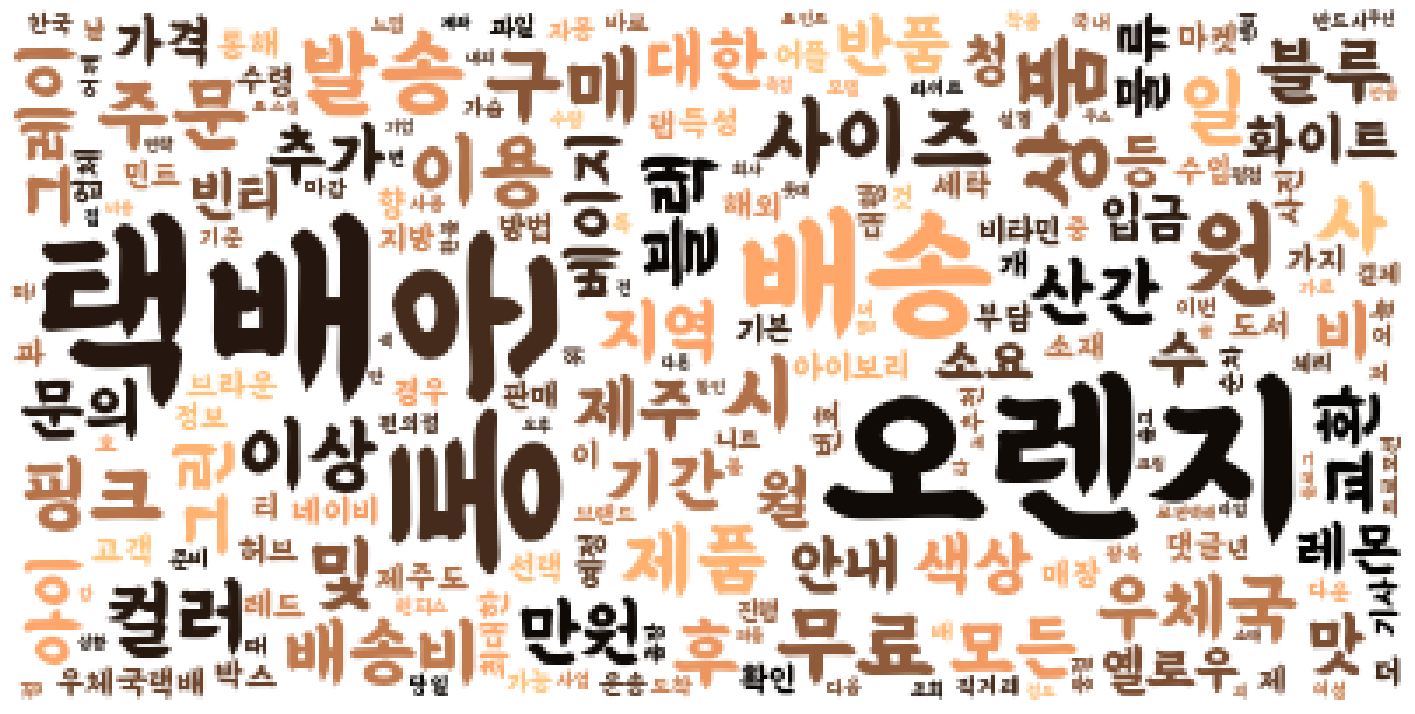

In [25]:
tresult = get_tags(textdata,ntags=200)

Wordcloud(tresult,'커피블로그')
#Wrodcloud(tresult,'커피블로그',/mask/mask...)